In [ ]:
from cnnface.stimulus.Image_process import img_similarity,nor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
# 在anconda的python3.6里运行, 记录 平均面孔的代码

from facemorpher import averager,list_imgpaths
import os

prepath = r'D:\cnnface\gender_analysis\train_stimulus\male'
imgs_path = os.listdir(prepath)
target_prepath = r'D:\cnnface\gender_analysis\face_template'

for img_path in imgs_path:
    target_path = os.path.join(target_prepath, img_path + '.png')
    img_path = os.path.join(prepath, img_path)
    averager(list_imgpaths(img_path), None, int(512), int(512), 'transparent', True, target_path)
    

In [ ]:
# 批量移动文件
import os
import shutil

ori_path =r'D:\RAF\RAF\basic\Image\aligned\aligned'
sub_list= os.listdir(ori_path)

i = 1
for sub in sub_list:
   sub_path = os.path.join(ori_path,sub)
   img_list = os.listdir(sub_path)
   for img in img_list:
       img_path = os.path.join(sub_path,img)
       i_str = str(i).zfill(6)
       tar_path = 'D:\VGGface2\overlap_male/{}.jpg'.format(i_str)
       i = i + 1 
       shutil.move(img_path,tar_path)



In [ ]:
# 计算 roc 曲线
    
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual_label = np.random.choice((0,1),(100,))
y_score = np.ones(100)
y_score[:50] = 0

fpr, tpr, threshold = roc_curve(actual_label,y_score)
auc_value = auc(fpr,tpr)
print(auc_value)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % auc_value)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## 批量移除rcicr生成的 inv 文件
import os
for i in range(9,21):
    prepath = r'D:\cnnface\gender_analysis\noise_stimulus\baseface\part{}'.format(i)
    imgs_list = os.listdir(prepath)
    for img in imgs_list:
        img_split = img.split('_')
        if 'inv.png' in img_split:
            img_path = os.path.join(prepath,img)
            os.remove(img_path)


In [ ]:
# 生成不同数量label 生成的ci
from cnnface.analysis.generate_ci import cal_paramci,generateCI
from cnnface.stimulus.Image_process import nor
from PIL import Image
import numpy as np
from cnnface.stimulus.Image_process import img_similarity
import seaborn as sns
import matplotlib.pyplot as plt

param_20000 = np.load(r'D:\cnnface\gender_analysis\human_result\exp\gender\label/param_exp.npy')
label = np.load(r'D:\cnnface\gender_analysis\human_result\exp\gender\label/label_sum.npy')
target_path = r'D:\cnnface\gender_analysis\CI_analysis\CIs_img\CIs/ci{}.jpg'
cis = []
for i in range(16000):
    if i%50 == 0 and i > 100:
        param_part = param_20000[:i]
        label_part = label[:i]
        param_ci = cal_ci(param_part, label_part)
        ci = generateCI(param_ci)
        ci_nor = nor(ci) *255
        cis.append(ci_nor)
        #ci_img = Image.fromarray(ci_nor).convert('RGB')
        #save_path = target_path.format(i)
        #ci_img.save(save_path)

#  绘制不同trials重建的CI 跟最优的CI的相关变化曲线，从而说说明多少trials 图像就较为稳定了。
sns.set_style('darkgrid')

ci_max = cis[-1]
cors = []
for c in cis:
    cor = img_similarity(ci_max,c,method='pearson')
    cors.append(cor)

bins = range(1,16000)
x = [b  for b in bins if b%50 == 0 and b > 100]
x.append(16000)
cors.append(1)
fig = sns.lineplot(x,cors)
plt.savefig('D:\cnnface\gender_analysis\CI_analysis\CIs_img\CIs/corr16000.png',dpi=800)

In [ ]:
import numpy as np
import pandas as pd
import os
from cnnface.analysis.generate_ci import generateCI, cal_ci
import matplotlib.pyplot as plt

def hum_csv2label(csvfile_path):
    humanData = pd.read_csv(csvfile_path, skiprows=1)
    rating = humanData['Rating']
    label_sub = np.array([1 if r == -1 or r == -0.1 else 0 for r in rating])
    return label_sub

prepath = 'D:\cnnface\gender_analysis\human_result\exp\gender\only/part{}'
param_5000 = np.load(r'D:\cnnface\gender_analysis\noise_stimulus\metadata/params_5000.npy')
for i in range(1, 6):
    part_path = prepath.format(i)
    part_sub = os.listdir(part_path)
    for sub in part_sub:
        csv_file_path = os.path.join(part_path, sub)
        label_sub = hum_csv2label(csv_file_path)
        name = sub.split('_')[-1].split('.')[0]
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject/label/label_{}'.format(name),label_sub)
        param_sub = param_5000[(i-1)*1000:i*1000]
        param_ci = cal_ci(param_sub, label_sub)
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject\param_ci/param_ci_{}'.format(name),param_ci)
        ci = generateCI(param_ci)
        np.save(r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci/ci_{}'.format(name),ci)
        plt.imshow(ci,cmap='jet')
        plt.colorbar()
        plt.axis('off')
        plt.show()
        plt.imsave(r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci_img/ci_{}.jpg'.format(name),ci,cmap='jet')

In [ ]:
# 叠加平均 CI
import numpy as np
import os
from cnnface.stimulus.Image_process import nor

prepath_ci= r'D:\cnnface\gender_analysis\human_result\CIs\subject\ci'
ci_list = os.listdir(prepath_ci)
cis = []
for ci in ci_list:
    ci_path = os.path.join(prepath_ci,ci)
    ci = np.load(ci_path)
    ci_nor = nor(ci) * 255
    cis.append(ci)
cis = np.array(cis)
ci_sum = cis.sum(axis=0)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(ci_sum,cmap='jet')
plt.imsave(r'D:\cnnface\gender_analysis\human_result\CIs\subject/ci_sum.jpg',ci_sum,cmap='jet')

In [ ]:
# 叠加平均 CI
import numpy as np
import os
from cnnface.stimulus.Image_process import nor
from cnnface.analysis.generate_ci import generateCI, cal_ci
import matplotlib.pyplot as plt

prepath_ci= r'D:\cnnface\gender_analysis\human_result\CIs\subject\param_ci\param4'
ci_list = os.listdir(prepath_ci)
p_cis = []
for ci in ci_list:
    ci_path = os.path.join(prepath_ci,ci)
    ci = np.load(ci_path)
    ci_nor = nor(ci) * 255
    p_cis.append(ci)
p_cis = np.array(p_cis)
p_ci_sum = p_cis.sum(axis=0)
cixxx = generateCI(p_ci_sum)
plt.imshow(cixxx,cmap='jet')

In [ ]:
# 计算两张平均脸的物理差异
import numpy as np
from PIL import Image

female_aver = np.array(Image.open(r'D:\cnnface\gender_analysis\face_template\gray/female_average_gray_enhance.jpg')).astype('int32')
male_aver = np.array(Image.open(r'D:\cnnface\gender_analysis\face_template\gray/male_average_gray_enhance.jpg')).astype('int32')

from cnnface.stimulus.Image_process import nor,image_freq_hist_plot
contrast = nor(female_aver - male_aver)
contrast_img = Image.fromarray(contrast).convert('L')

import matplotlib.pyplot as plt
import seaborn as sns
plt.imshow(contrast,cmap='jet')
plt.axis('off')
plt.show()
sns.set_style('dark')
hist_arr = contrast.reshape(-1) 
sns.distplot(hist_arr)

In [ ]:
# 整理RAF数据库图片
import pandas as pd

import os
import shutil

ori_path =r'D:\RAF\RAF\basic\Image\aligned\aligned'
img_list= os.listdir(ori_path)


for img in img_list:
   img_path = os.path.join(ori_path,img)
   img_strip = img.replace('_aligned','')

   tar_path = r'D:\RAF\RAF\basic\Image\aligned\aligned/{}'.format(img_strip)
   shutil.move(img_path,tar_path)

label_file = pd.read_table(r'D:\RAF\RAF\basic\EmoLabel/list_patition_label.txt',sep=' ')

happy = label_file[label_file.label==4]['picname']
sad = label_file[label_file.label==5]['picname']
neutral = label_file[label_file.label==7]['picname']


prepath = r'D:\RAF\RAF\basic\Image\aligned\aligned'
pretarget_path = r'D:\RAF\RAF'
emotion = ['happy','sad','neutral']
for e in emotion:
    if os.path.exists(os.path.join(pretarget_path,e,'train')) == False:
        os.mkdir(os.path.join(pretarget_path,e,'train'))
    if os.path.exists(os.path.join(pretarget_path,e,'test')) == False:
        os.mkdir(os.path.join(pretarget_path,e,'test'))
    for picname in eval(e):
        picpath = os.path.join(prepath, picname)
        if 'train' in picname:
            target_path = os.path.join(pretarget_path,e,'train',picname)
        elif 'test' in picname:
            target_path = os.path.join(pretarget_path,e,'test',picname)

        shutil.move(picpath,target_path)

In [3]:
# 不同频率参数d的相关
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def cnnParamContrib2humanSum(d_cnn,d_human,threshold):
    # calculate the sum of contribution and calculate the contribution percentage of signal parameter.
    sumContrib_cnn = d_cnn.sum()
    percentContrib_cnn = d_cnn / sumContrib_cnn

    # sort the contribution and calculate the cumulative contribution along the decreasing with contribution.
    paramContribSortIndex = np.argsort(-percentContrib_cnn)
    paramContribSorted_cnn = percentContrib_cnn[np.argsort(-percentContrib_cnn)]
    cumSumContrib_cnn = np.cumsum(paramContribSorted_cnn)

    # find the parameters which occupy 80% contribution and more informative than others.
    # return the high informative parameters Index
    paramOver = len(np.argwhere(cumSumContrib_cnn < threshold))+1
    paramIndexOver = paramContribSortIndex[:paramOver]

    # calculate the sum of contribution and calculate the contribution percentage of signal parameter.(human)
    sumContrib_human = d_human.sum()
    percentContrib_human = d_human / sumContrib_human

    # Calculate the contribution of high informative parameters of cnn for human using the high informative parameters Index
    cnnParamContrib2human = percentContrib_human[paramIndexOver]

    # sum up the contribution percentages of the parameters
    cnnParamContrib2humanSum = cnnParamContrib2human.sum()

    x= d_cnn[paramIndexOver]
    y= d_human[paramIndexOver]
    paramContriSimilarity = stats.spearmanr(x,y)

    return cnnParamContrib2humanSum, paramContriSimilarity

d_cnn = np.array(np.load(r'D:\cnnface\Data_sorted\vggface\param_analysis\data/d_abs.npy'))
d_human = np.load(r'D:\cnnface\gender_analysis\human_result\para_significant/cohensd_sum.npy')

def dScale(d):
    dScale = []
    dScale.append(d[:12])
    dScale.append(d[12:60])
    dScale.append(d[60:252])
    dScale.append(d[252:1020])
    dScale.append(d[1020:])
    return dScale

d_cnnScale = dScale(d_cnn)
d_humanScale = dScale(d_human)

similarityScale = [cnnParamContrib2humanSum(cnn,human,1.0)[1][0] for cnn,human in zip(d_cnnScale, d_humanScale)]

sns.set_style('darkgrid')
scale= [2,4,8,16,32]
sns.barplot(d_cnnScale,similarityScale)
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

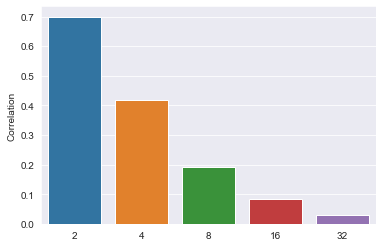

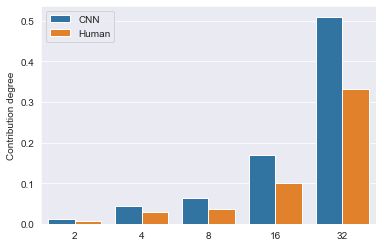

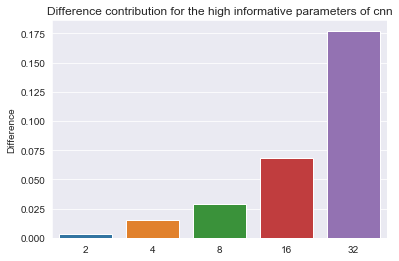

In [4]:
# calculate the
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


data = pd.read_csv(r'D:\cnnface\gender_analysis\Result\similarity of parameter contribution/data.csv')
cnn_contri = data.contribution_cnn
human_contri = data.contribution_human
indexOver80 = np.array(data.index[data.Over80 == 1])

def data2diffscale(data,index=None):
    dataSubScale = []
    if type(index) is np.ndarray:
        dataSubScale.append(data[index[index<12]])
        dataSubScale.append(data[index[(index>=12) & (index<60)]])
        dataSubScale.append(data[index[(index>=60) & (index<252)]])
        dataSubScale.append(data[index[(index>=252) & (index<1020)]])
        dataSubScale.append(data[index[(index>=1020) & (index<4092)]])
    else:
        dataSubScale.append(data[:12])
        dataSubScale.append(data[12:60])
        dataSubScale.append(data[60:252])
        dataSubScale.append(data[252:1020])
        dataSubScale.append(data[1020:])

    return dataSubScale

def index2diffscale(index):
    indexSubScale = []
    indexSubScale.append(index[index<12])
    indexSubScale.append(index[(index>=12) & (index<60)])
    indexSubScale.append(index[(index>=60) & (index<252)])
    indexSubScale.append(index[(index>=252) & (index<1020)])
    indexSubScale.append(index[(index>=1020) & (index<4092)])
    return indexSubScale

cnnContriFreq = data2diffscale(cnn_contri,indexOver80)
humanContriFreq = data2diffscale(human_contri,indexOver80)
correlation = [spearmanr(cnn,human)[0] for cnn, human in zip(cnnContriFreq,humanContriFreq)]
sns.set_style('darkgrid')
sns.barplot([2,4,8,16,32],correlation)
plt.ylabel('Correlation')
plt.show()

cnnContriFreq = [con.sum() for con in cnnContriFreq]
humanContriFreq = [con.sum() for con in humanContriFreq]

scale = [2,4,8,16,32] * 2
contribution = cnnContriFreq + humanContriFreq
hue = ['CNN'] * 5 + ['Human'] *5

sns.barplot(scale,contribution,hue=hue)
plt.ylabel('Contribution degree')
plt.show()

change = [cnn - human for cnn, human in zip(cnnContriFreq,humanContriFreq)]
sns.barplot([2,4,8,16,32],change)
plt.title('Difference contribution for the high informative parameters of cnn')
plt.ylabel('Difference')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
sns.set_style('darkgrid')

d = np.load(r'D:\cnnface\gender_analysis\human_result\para_significant/cohensd_sum.npy')
pSignIndex = np.load(r'D:\cnnface\gender_analysis\human_result\para_significant/p_signIndex.npy')

dSignScale = data2diffscale(d,pSignIndex)
numdSignScale = [len(d) for d in dSignScale]
scale = [2,4,8,16,32]
sns.barplot(scale,numdSignScale)
for x, y in enumerate(numdSignScale):
    plt.text(x, y+0.2, "%s" %y)
plt.title(' The significant parameters of human ')
plt.show()

In [ ]:
# 生成只有差异比较大的参数的ci
import numpy as np
from cnnface.analysis.generate_ci import generateCI
import matplotlib.pyplot as plt

diffdValue = np.load(r'D:\cnnface\gender_analysis\Result\difference/diffValue.npy')

diffValueAbs = np.abs(diffdValue)
highDiffIndex = np.argwhere(diffValueAbs > 2.4)

param_ci = np.load(r'D:\cnnface\gender_analysis\human_result\CIs/param_ci_human.npy')
highDiff_paramci = np.zeros(4092)
highDiff_paramci[highDiffIndex] = param_ci[highDiffIndex]

sclae= [2,4,8,16,32]


In [ ]:
# 生成只有差异比较大的参数的ci
import numpy as np
from cnnface.analysis.generate_ci import generateCI
import matplotlib.pyplot as plt


diffdValue = np.load(r'D:\cnnface\gender_analysis\Result\difference/diffValue.npy')

diffValueAbs = np.abs(diffdValue)
highDiffIndex = np.argwhere(diffValueAbs > 2.4)

param_ci = np.load(r'D:\cnnface\gender_analysis\human_result\CIs/param_ci_human.npy')
highDiff_paramci = np.zeros(4092)
highDiff_paramci[highDiffIndex] = param_ci[highDiffIndex]

scale= [2,4,8,16,32]
highDiff_ci = generateCI(param_ci,level=[2,4,8,16,32])
for ci,s in zip(highDiff_ci,scale):
    plt.imshow(ci,cmap='jet')
    plt.axis('off')
    plt.title('Scale {}'.format(s))
    plt.show()

In [ ]:
# 计算所有噪声的实际强度
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns

baseface = Image.open(r'D:\cnnface\gender_analysis\face_template\gray/baseface.jpg')
bf_arr = np.array(baseface).astype('float32')

csv_file_path = r'D:\cnnface\gender_analysis\noise_stimulus/baseface_20000.csv'
with open(csv_file_path,'r') as f:
    picprepath = f.readline().rstrip()
csv_file = pd.read_csv(csv_file_path,skiprows=1)
picname = list(csv_file['stimID'])

noise_all = []
for pic in picname:
    picpath = os.path.join(picprepath,pic)
    picimg = np.array(Image.open(picpath)).astype('float32')
    noise = picimg - bf_arr
    noise_all.append(noise)
sns.distplot(np.array(noise_all))

In [ ]:
import numpy as np
def dice(a1,a2):
    intersect = np.intersect1d(a1,a2)
    son = 2 *len(intersect)
    mother = len(a1) + len(a2)
    diceIndex = son/mother
    return diceIndex

paraIndexOver80_human = np.load(r'D:\cnnface\gender_analysis\Result\difference/paraIndexOver80_human.npy')
paraIndexOver80_cnn = np.load(r'D:\cnnface\gender_analysis\Result\difference/paraIndexOver80_cnn.npy')

In [ ]:
def dice_coefficient(a, b):
    """dice coefficient 2nt/na + nb."""
    a_bigrams = set(a)
    b_bigrams = set(b)
    overlap = len(a_bigrams & b_bigrams)
    return overlap * 2.0/(len(a_bigrams) + len(b_bigrams))

In [ ]:
humanConFre = data2diffscale(d_human,paraIndexOver80_human)
cnnConFre = data2diffscale(d_cnn,paraIndexOver80_human)
human_correlation = [stats.spearmanr(cnn,human) for cnn, human in zip(cnnConFre,humanConFre)]